In [500]:
## 1.기본
import numpy as np #numpy 패키지 가져오기
import matplotlib.pyplot as plt 
import seaborn as sns
## 2.데이터 가져오기
import pandas as pd # csv ->dataframe22
from sklearn import datasets # python 저장 데이터 가져오기
# 4. 훈련/검증용 데이터 분리
from sklearn.model_selection import train_test_split
## 5. 분류모델구축
from sklearn.tree import DecisionTreeClassifier #21
from sklearn.neighbors import KNeighborsClassifier # K-
from sklearn. linear_model import LogisticRegression #3X^9 37 29
from sklearn.ensemble import RandomForestClassifier 
from sklearn.ensemble import AdaBoostClassifier

## 5_1.앙상블 모델 구축
from sklearn.ensemble import VotingClassifier #2 (Majority Voting)
## 6. 모델검정
from sklearn.metrics import confusion_matrix, classification_report #2
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score #S, 925
from sklearn.metrics import roc_curve, auc # ROC 201
## 7. 최적화
from sklearn.model_selection import learning_curve, validation_curve 
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import cross_val_score 

In [501]:
df = pd.read_csv(r"C:\Users\a5365\OneDrive\바탕 화면\ddd\data.csv")

In [502]:
df

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,Unnamed: 32
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.30010,0.14710,...,17.33,184.60,2019.0,0.16220,0.66560,0.7119,0.2654,0.4601,0.11890,NaN
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.08690,0.07017,...,23.41,158.80,1956.0,0.12380,0.18660,0.2416,0.1860,0.2750,0.08902,NaN
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.19740,0.12790,...,25.53,152.50,1709.0,0.14440,0.42450,0.4504,0.2430,0.3613,0.08758,NaN
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.24140,0.10520,...,26.50,98.87,567.7,0.20980,0.86630,0.6869,0.2575,0.6638,0.17300,NaN
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.19800,0.10430,...,16.67,152.20,1575.0,0.13740,0.20500,0.4000,0.1625,0.2364,0.07678,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
564,926424,M,21.56,22.39,142.00,1479.0,0.11100,0.11590,0.24390,0.13890,...,26.40,166.10,2027.0,0.14100,0.21130,0.4107,0.2216,0.2060,0.07115,NaN
565,926682,M,20.13,28.25,131.20,1261.0,0.09780,0.10340,0.14400,0.09791,...,38.25,155.00,1731.0,0.11660,0.19220,0.3215,0.1628,0.2572,0.06637,NaN
566,926954,M,16.60,28.08,108.30,858.1,0.08455,0.10230,0.09251,0.05302,...,34.12,126.70,1124.0,0.11390,0.30940,0.3403,0.1418,0.2218,0.07820,NaN
567,927241,M,20.60,29.33,140.10,1265.0,0.11780,0.27700,0.35140,0.15200,...,39.42,184.60,1821.0,0.16500,0.86810,0.9387,0.2650,0.4087,0.12400,NaN


In [503]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 33 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   id                       569 non-null    int64  
 1   diagnosis                569 non-null    object 
 2   radius_mean              569 non-null    float64
 3   texture_mean             569 non-null    float64
 4   perimeter_mean           569 non-null    float64
 5   area_mean                569 non-null    float64
 6   smoothness_mean          569 non-null    float64
 7   compactness_mean         569 non-null    float64
 8   concavity_mean           569 non-null    float64
 9   concave points_mean      569 non-null    float64
 10  symmetry_mean            569 non-null    float64
 11  fractal_dimension_mean   569 non-null    float64
 12  radius_se                569 non-null    float64
 13  texture_se               569 non-null    float64
 14  perimeter_se             5

In [504]:
df.isnull().sum()

id                           0
diagnosis                    0
radius_mean                  0
texture_mean                 0
perimeter_mean               0
area_mean                    0
smoothness_mean              0
compactness_mean             0
concavity_mean               0
concave points_mean          0
symmetry_mean                0
fractal_dimension_mean       0
radius_se                    0
texture_se                   0
perimeter_se                 0
area_se                      0
smoothness_se                0
compactness_se               0
concavity_se                 0
concave points_se            0
symmetry_se                  0
fractal_dimension_se         0
radius_worst                 0
texture_worst                0
perimeter_worst              0
area_worst                   0
smoothness_worst             0
compactness_worst            0
concavity_worst              0
concave points_worst         0
symmetry_worst               0
fractal_dimension_worst      0
Unnamed:

Number of cells labeled Benign:  357
Number of cells labeled Malignant :  212

% of cells labeled Benign 62.74 %
% of cells labeled Malignant 37.26 %


C:\Users\a5365\Anaconda3\envs\data_analysis\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


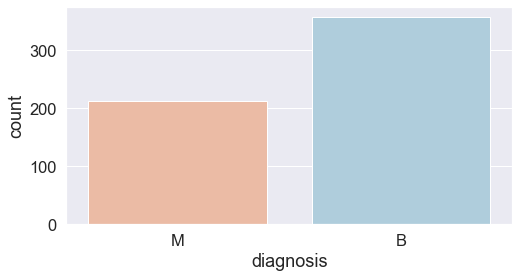

In [505]:
plt.figure(figsize=(8, 4))
sns.countplot(df['diagnosis'], palette='RdBu')

# 각 클래스 마다 숫자 세기
benign, malignant = df['diagnosis'].value_counts()
print('Number of cells labeled Benign: ', benign)
print('Number of cells labeled Malignant : ', malignant)
print('')
print('% of cells labeled Benign', round(benign / len(df) * 100, 2), '%')
print('% of cells labeled Malignant', round(malignant / len(df) * 100, 2), '%')

In [506]:
numericals=df.select_dtypes(include='number').columns

In [507]:
numericals=['radius_mean', 'texture_mean', 'perimeter_mean', 'area_mean',
       'smoothness_mean', 'compactness_mean', 'concavity_mean',
       'concave points_mean', 'symmetry_mean', 'fractal_dimension_mean',
       'radius_se', 'texture_se', 'perimeter_se', 'area_se', 'smoothness_se',
       'compactness_se', 'concavity_se', 'concave points_se', 'symmetry_se',
       'fractal_dimension_se', 'radius_worst', 'texture_worst',
       'perimeter_worst', 'area_worst', 'smoothness_worst',
       'compactness_worst', 'concavity_worst', 'concave points_worst',
       'symmetry_worst', 'fractal_dimension_worst']

In [508]:
def histogram(df,numericals,hues,title):
    sns.color_palette("husl", 8)
    sns.set_style('darkgrid')
    count=1
    plt.subplots(figsize=(30, 25))
    for i in numericals:
        plt.subplot(8,4,count)
        ax = plt.gca()  
        sns.set(font_scale = 1.5)
        sns.histplot(x=df[i],kde=True,bins=50, hue=hues,palette="Set2", linewidth=2.5,color='g')
        plt.xticks(rotation=90)
        ax.set_title("Distribution of {}".format(i), fontsize=23)
        count+=1 
        plt.tight_layout()
    plt.suptitle(title, y=1.03, fontsize=30)
    plt.show()

In [509]:
hues=df['diagnosis']
title='distribution of cancer type'

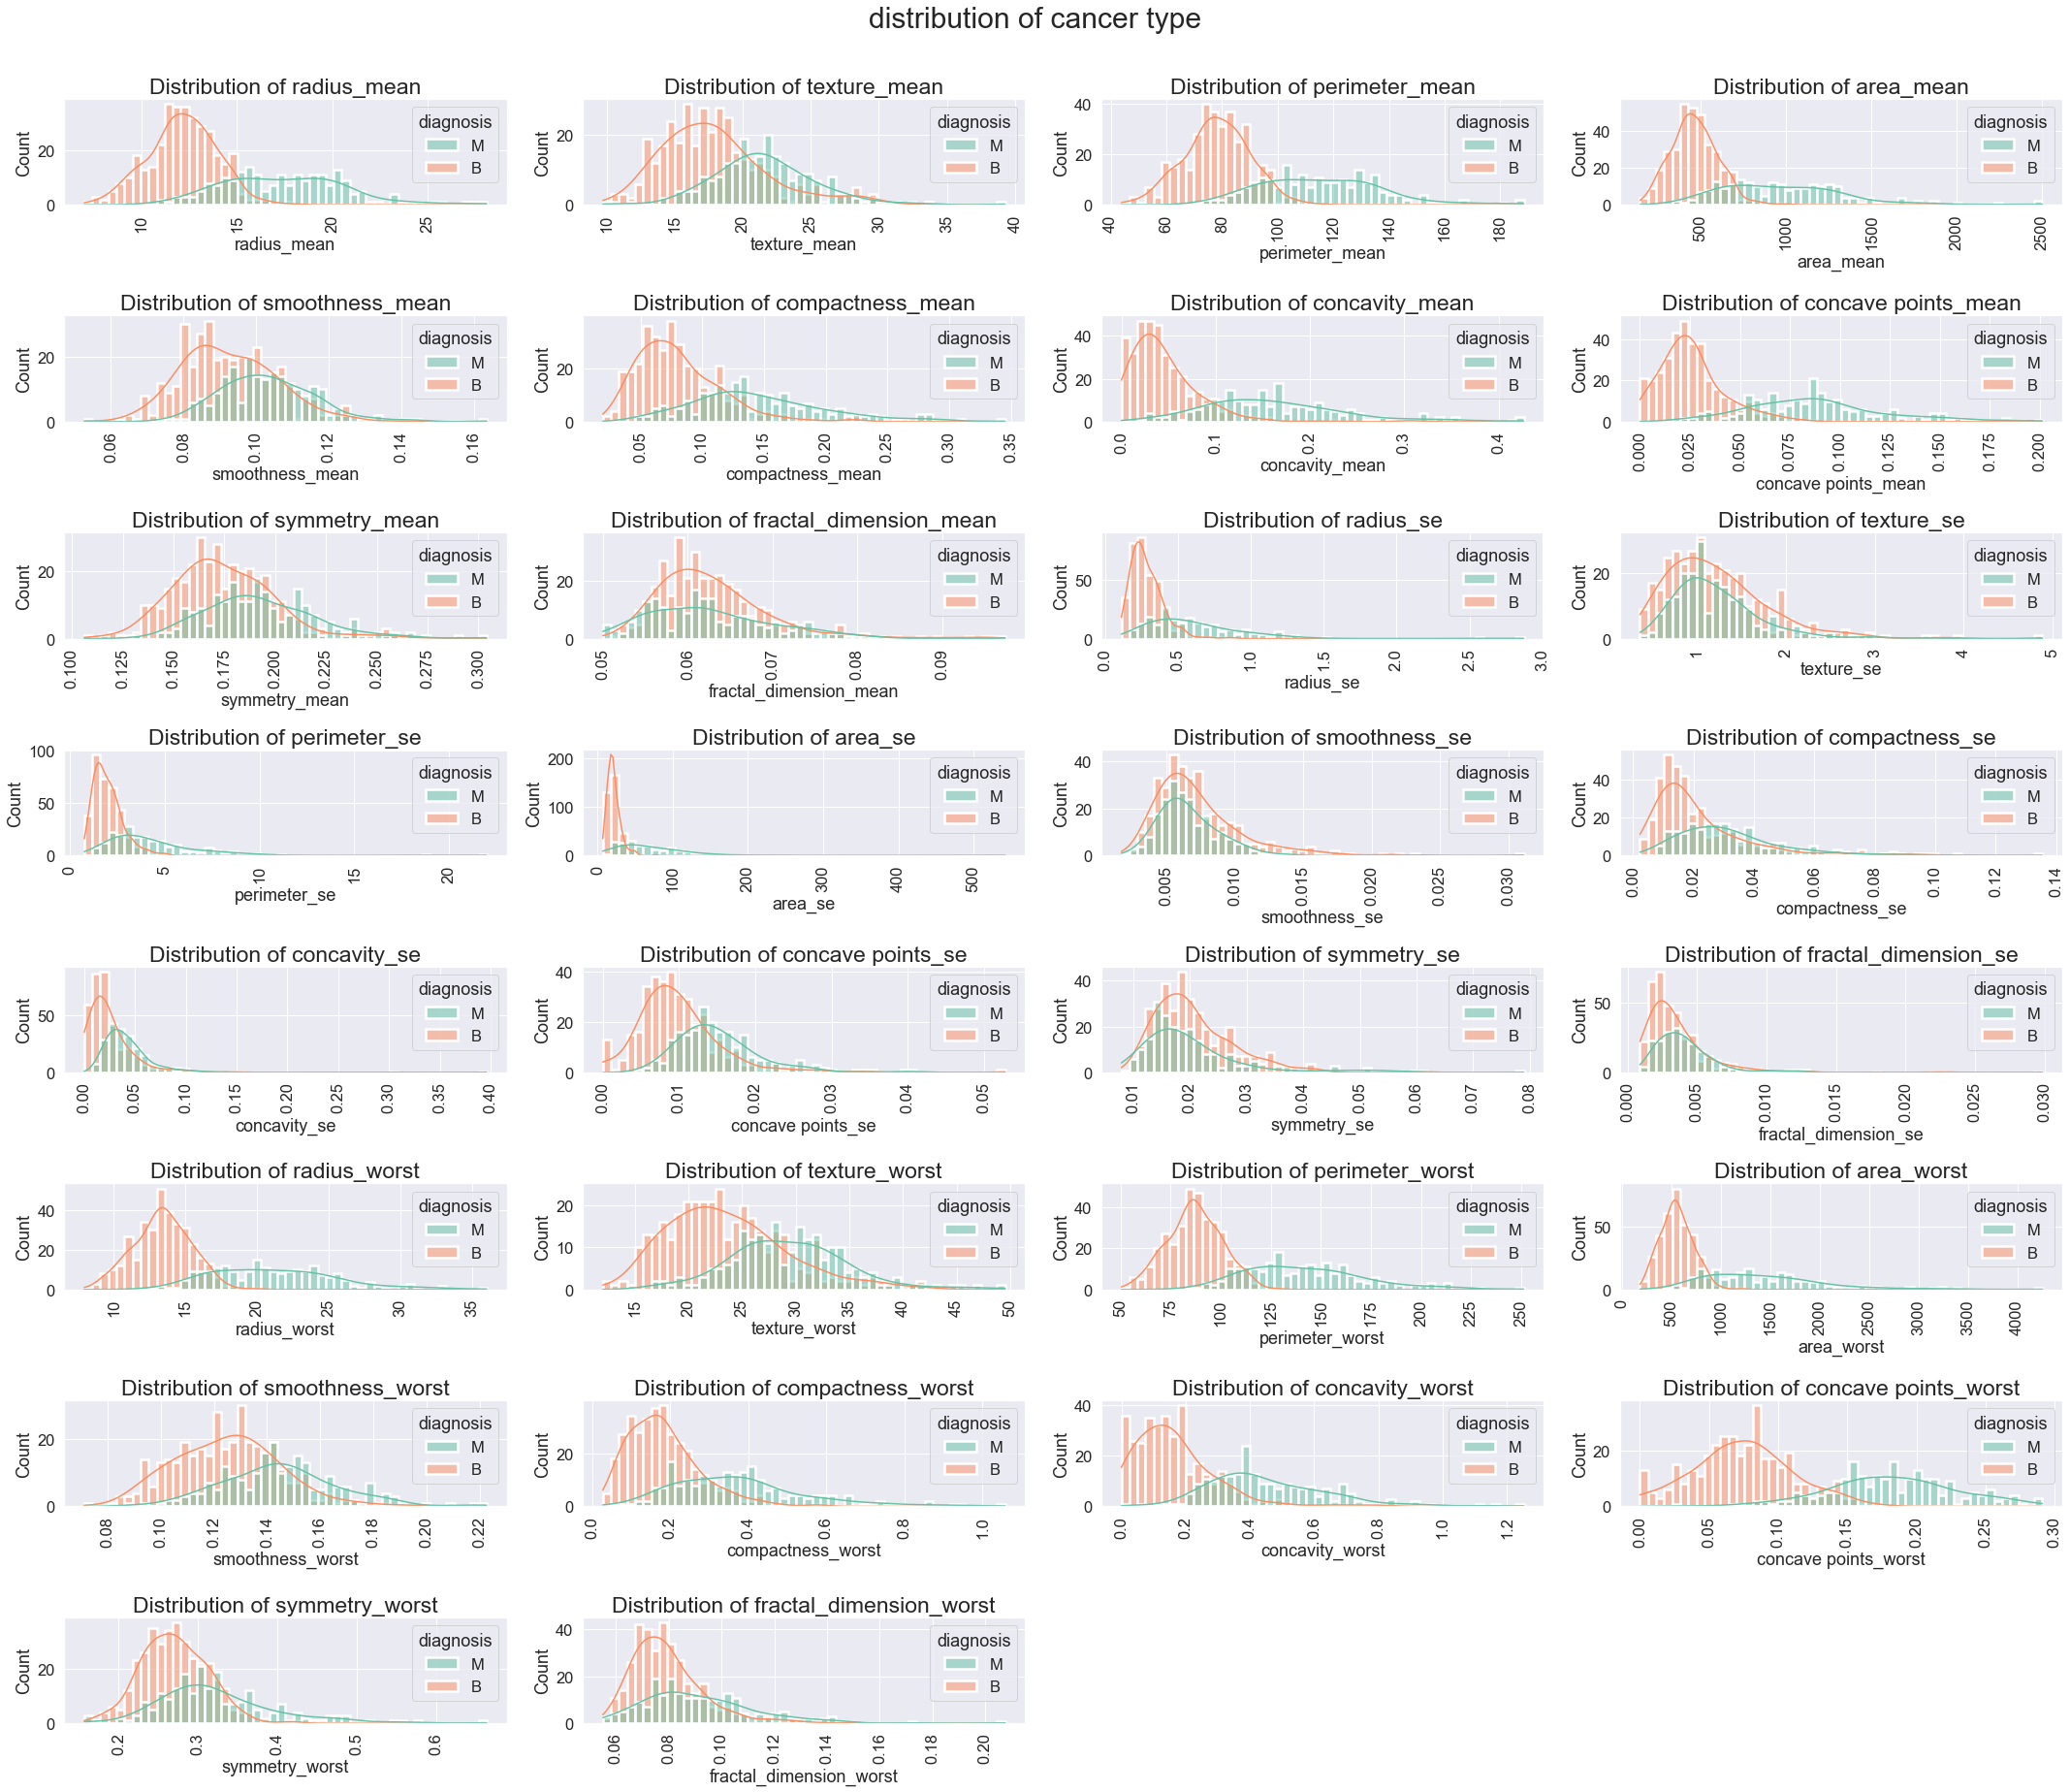

In [510]:
histogram(df,numericals,hues,title)

C:\Users\a5365\AppData\Local\Temp\ipykernel_15768\3758546075.py:4: DeprecationWarning: `np.bool` is a deprecated alias for the builtin `bool`. To silence this warning, use `bool` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.bool_` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  mask = np.zeros_like(corr, dtype=np.bool)


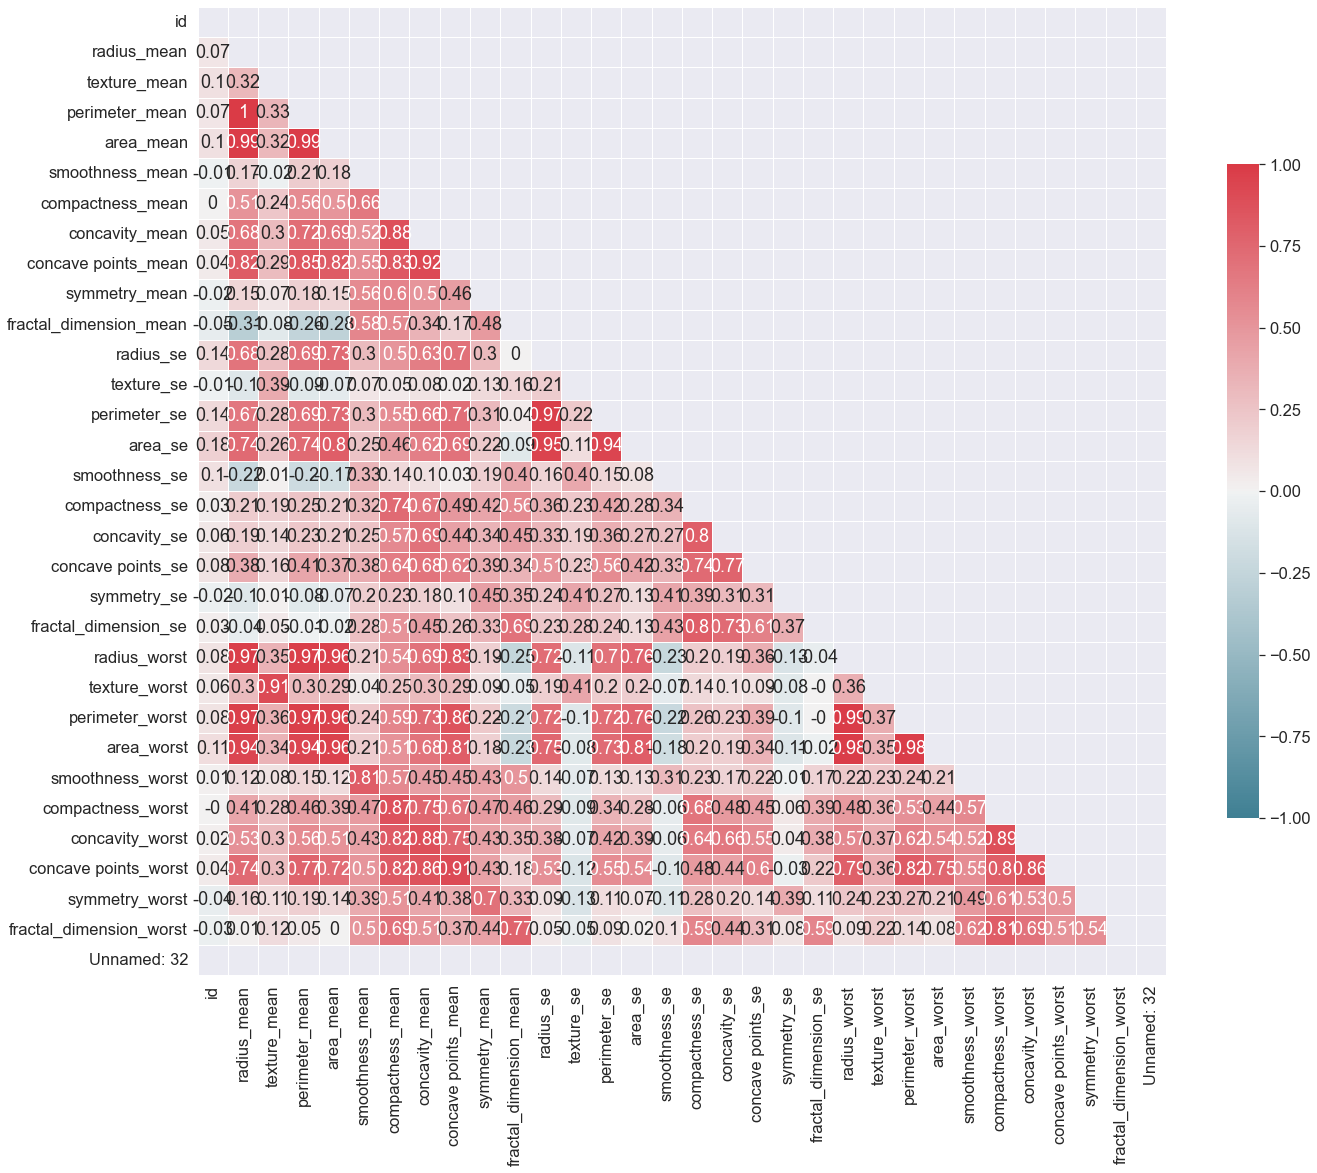

In [511]:
# 상관 행렬 생성 및 시각화
corr = df.corr().round(2)

mask = np.zeros_like(corr, dtype=np.bool)
mask[np.triu_indices_from(mask)] = True

# 사이즈 설정
f, ax = plt.subplots(figsize=(20, 20))

# 맵 설정
cmap = sns.diverging_palette(220, 10, as_cmap=True)

sns.heatmap(corr, mask=mask, cmap=cmap, vmin=-1, vmax=1, center=0,
            square=True, linewidths=.5, cbar_kws={"shrink": .5}, annot=True)

plt.tight_layout()

In [512]:
cols = ['radius_worst', 
        'texture_worst', 
        'perimeter_worst', 
        'area_worst', 
        'smoothness_worst', 
        'compactness_worst', 
        'concavity_worst',
        'concave points_worst', 
        'symmetry_worst', 
        'fractal_dimension_worst']
df = df.drop(cols, axis=1)

cols = ['perimeter_mean',
        'perimeter_se', 
        'area_mean', 
        'area_se']
df = df.drop(cols, axis=1)


cols = ['concavity_mean',
        'concavity_se', 
        'concave points_mean', 
        'concave points_se']
df = df.drop(cols, axis=1)


df.columns

Index(['id', 'diagnosis', 'radius_mean', 'texture_mean', 'smoothness_mean',
       'compactness_mean', 'symmetry_mean', 'fractal_dimension_mean',
       'radius_se', 'texture_se', 'smoothness_se', 'compactness_se',
       'symmetry_se', 'fractal_dimension_se', 'Unnamed: 32'],
      dtype='object')

C:\Users\a5365\AppData\Local\Temp\ipykernel_15768\148293325.py:2: DeprecationWarning: `np.bool` is a deprecated alias for the builtin `bool`. To silence this warning, use `bool` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.bool_` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  mask = np.zeros_like(corr, dtype=np.bool)


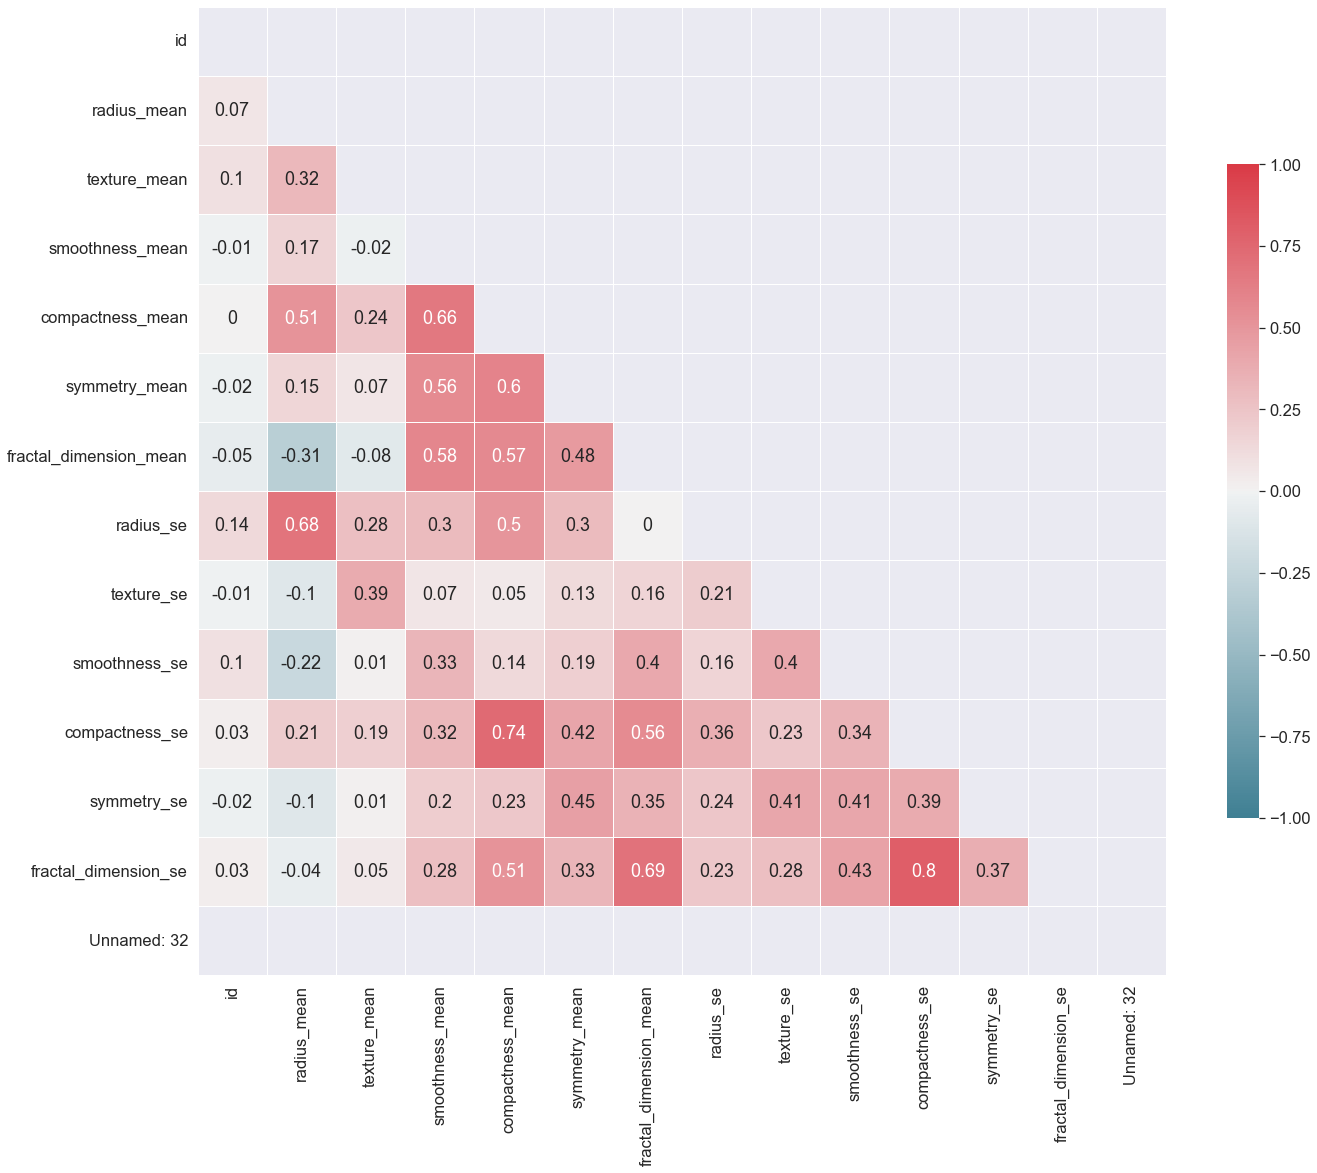

In [513]:
corr = df.corr().round(2)
mask = np.zeros_like(corr, dtype=np.bool)
mask[np.triu_indices_from(mask)] = True

f, ax = plt.subplots(figsize=(20, 20))
sns.heatmap(corr, mask=mask, cmap=cmap, vmin=-1, vmax=1, center=0,
            square=True, linewidths=.5, cbar_kws={"shrink": .5}, annot=True)
plt.tight_layout()

In [514]:
df = pd.read_csv(r"C:\Users\a5365\OneDrive\바탕 화면\ddd\wiscbcdata.csv",index_col=0)

In [515]:
df['diagnosis']=df['diagnosis'].replace({'B': 0, 'M': 1})

In [516]:
X=df.drop(columns='diagnosis')
y=df['diagnosis']

In [517]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=1234, stratify=y)	

In [518]:
random_state = 12
X_train, X_test, y_train, y_test = train_test_split(X, y,test_size = 0.3,shuffle = True,random_state=random_state)
log_reg = LogisticRegression(max_iter = 5000)
log_reg.fit(X_train, y_train)
log_reg.score(X_test,y_test)

0.9181286549707602

In [519]:
df_corr = df.corr()['diagnosis'].abs().sort_values(ascending=False)
df_corr

diagnosis                  1.000000
concave points_worst       0.793566
perimeter_worst            0.782914
concave points_mean        0.776614
radius_worst               0.776454
perimeter_mean             0.742636
area_worst                 0.733825
radius_mean                0.730029
area_mean                  0.708984
concavity_mean             0.696360
concavity_worst            0.659610
compactness_mean           0.596534
compactness_worst          0.590998
radius_se                  0.567134
perimeter_se               0.556141
area_se                    0.548236
texture_worst              0.456903
smoothness_worst           0.421465
symmetry_worst             0.416294
texture_mean               0.415185
concave points_se          0.408042
smoothness_mean            0.358560
symmetry_mean              0.330499
fractal_dimension_worst    0.323872
compactness_se             0.292999
concavity_se               0.253730
fractal_dimension_se       0.077972
smoothness_se              0

In [520]:
features = df_corr[df_corr > 0.6].index.to_list()[1:]
features

['concave points_worst',
 'perimeter_worst',
 'concave points_mean',
 'radius_worst',
 'perimeter_mean',
 'area_worst',
 'radius_mean',
 'area_mean',
 'concavity_mean',
 'concavity_worst']

In [521]:
def calculate_vif(df, features):    
    vif, tolerance = {}, {}
    for feature in features:
        X = [f for f in features if f != feature]        
        X, y = df[X], df[feature]
        r2 = LinearRegression().fit(X, y).score(X, y)                
        
        tolerance[feature] = 1 - r2
        vif[feature] = 1/(tolerance[feature])
    return pd.DataFrame({'VIF': vif, 'Tolerance': tolerance})
calculate_vif(df,features)

,VIF,Tolerance
concave points_worst,17.130560,0.058375
perimeter_worst,204.329679,0.004894
concave points_mean,34.546872,0.028946
radius_worst,391.471018,0.002554
perimeter_mean,1519.882563,0.000658
area_worst,169.931222,0.005885
radius_mean,1606.575820,0.000622
area_mean,200.004550,0.005000
concavity_mean,30.806430,0.032461
concavity_worst,14.417687,0.069359


In [522]:
features = [
    'concave points_worst',
    'radius_mean',
    'concavity_mean',
]
calculate_vif(df,features)

,VIF,Tolerance
concave points_worst,4.759243,0.210117
radius_mean,2.266584,0.441193
concavity_mean,3.917617,0.255257


In [523]:
tree = DecisionTreeClassifier (max_depth=None,
                               criterion='entropy',
                               random_state=1)
forest = RandomForestClassifier(criterion='gini',
                                n_estimators=500,
                                random_state=1)
clf_labels = ['Decision tree', 'Random forest']
all_clf = [tree, forest]

In [524]:
for clf, label in zip(all_clf, clf_labels):
    scores = cross_val_score(estimator=clf,
                             X=X_train,
                             y=y_train,
                             cv=10,
                             scoring='roc_auc')
    print("ROC AUC: %0.3f (+/- %0.3f) [%s]"
          % (scores.mean(), scores.std(), label))  

ROC AUC: 0.923 (+/- 0.031) [Decision tree]
ROC AUC: 0.996 (+/- 0.006) [Random forest]


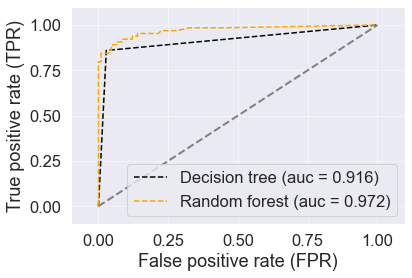

In [525]:
colors= ['black', 'orange', 'blue', 'green']
linestyles = [':','-.`, `-']
for clf, label, clr, Is \
    in zip(all_clf, clf_labels, colors, linestyles):
    clf.fit(X_train, y_train)
    y_pred = clf.predict_proba(X_test) [:, 1]
    fpr, tpr, thresholds = roc_curve (y_true=y_test,
                                      y_score=y_pred)
    roc_auc = auc(x=fpr, y=tpr)
    plt.plot(fpr, tpr,
             color=clr,
             linestyle= '--',
             label='%s (auc = %0.3f)' % (label, roc_auc))
             
plt.legend (loc='lower right')
plt.plot([0, 1], [0, 1],
         linestyle ='--',
         color='gray',
         linewidth=2)
plt.xlim([-0.1, 1.1])
plt.ylim([-0.1, 1.1])
plt.grid(alpha=0.5)
plt.xlabel('False positive rate (FPR)')
plt.ylabel('True positive rate (TPR)')

plt.show()

In [526]:
tree = DecisionTreeClassifier(max_depth=1, 
                            criterion='entropy',
                            random_state=1)
adaboost = AdaBoostClassifier (base_estimator=tree,
                              n_estimators=500,
                              learning_rate = 0.1,
                              random_state=1)
clf_labels =['Decision tree', 'Ada boost']
all_clf = [tree, adaboost]   

In [527]:
for clf, label in zip(all_clf, clf_labels):
    scores = cross_val_score(estimator=clf,
                             X=X_train,
                             y=y_train,
                             cv=10,
                             scoring='roc_auc')
    print("ROC AUC: %0.3f (+/- %0.3f) [%s]"
          % (scores.mean(), scores.std(), label))      

ROC AUC: 0.923 (+/- 0.043) [Decision tree]
ROC AUC: 0.993 (+/- 0.015) [Ada boost]


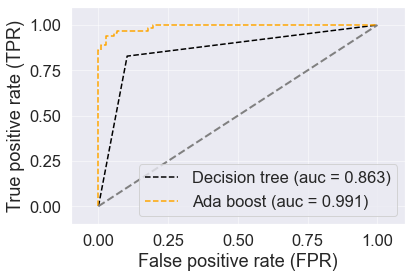

In [528]:
colors= ['black', 'orange', 'blue', 'green']
linestyles = [':','-.`, `-']
for clf, label, clr, Is \
    in zip(all_clf, clf_labels, colors, linestyles):
    clf.fit(X_train, y_train)
    y_pred = clf.predict_proba(X_test) [:, 1]
    fpr, tpr, thresholds = roc_curve (y_true=y_test,
                                      y_score=y_pred)
    roc_auc = auc(x=fpr, y=tpr)
    plt.plot(fpr, tpr,
             color=clr,
             linestyle= '--',
             label='%s (auc = %0.3f)' % (label, roc_auc))
             
plt.legend (loc='lower right')
plt.plot([0, 1], [0, 1],
         linestyle ='--',
         color='gray',
         linewidth=2)
plt.xlim([-0.1, 1.1])
plt.ylim([-0.1, 1.1])
plt.grid(alpha=0.5)
plt.xlabel('False positive rate (FPR)')
plt.ylabel('True positive rate (TPR)')

plt.show()

In [529]:
forest.fit(X_train, y_train)

y_pred = forest.predict(X_test)

print('잘못 분류된 샘플 개수: %d' % (y_test != y_pred).sum())
print('정확도: %.3f' % accuracy_score(y_test, y_pred))
print('정밀도: %.3f' % precision_score(y_true=y_test, y_pred=y_pred))
print('재현도: %.3f' % recall_score(y_true=y_test, y_pred=y_pred))
print('F1: %.3f' % f1_score(y_true=y_test, y_pred=y_pred))

잘못 분류된 샘플 개수: 14
정확도: 0.918
정밀도: 0.931
재현도: 0.844
F1: 0.885


In [530]:
adaboost.fit(X_train, y_train)

y_pred = adaboost.predict(X_test)

print('잘못 분류된 샘플 개수: %d' % (y_test != y_pred).sum())
print('정확도: %.3f' % accuracy_score(y_test, y_pred))
print('정밀도: %.3f' % precision_score(y_true=y_test, y_pred=y_pred))
print('재현도: %.3f' % recall_score(y_true=y_test, y_pred=y_pred))
print('F1: %.3f' % f1_score(y_true=y_test, y_pred=y_pred))

잘못 분류된 샘플 개수: 9
정확도: 0.947
정밀도: 0.951
재현도: 0.906
F1: 0.928


 1) perimeter_worst                0.154323
 2) area_worst                     0.124426
 3) radius_worst                   0.113044
 4) concave points_worst           0.107133
 5) concave points_mean            0.096208
 6) perimeter_mean                 0.058851
 7) area_mean                      0.054196
 8) concavity_mean                 0.050219
 9) radius_mean                    0.043697
10) area_se                        0.036466
11) concavity_worst                0.030445
12) perimeter_se                   0.015613
13) compactness_worst              0.014231
14) smoothness_worst               0.010508
15) texture_worst                  0.009714
16) texture_mean                   0.009411
17) compactness_mean               0.009115
18) symmetry_worst                 0.008651
19) radius_se                      0.008548
20) fractal_dimension_se           0.006256
21) concavity_se                   0.005843
22) fractal_dimension_worst        0.005619
23) smoothness_mean             

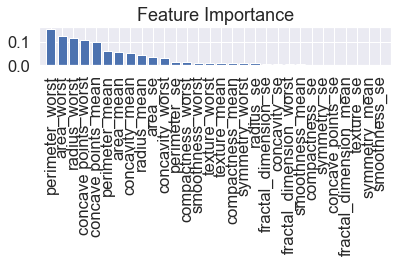

In [531]:
feat_labels = X.columns

importances = forest.feature_importances_

indices = np.argsort (importances) [::-1]

for f in range (X_train.shape [1]):
    print("%2d) %-*s %f" % (f + 1, 30,
                            feat_labels[indices [f]],
                            importances [indices [f]]))
plt.title('Feature Importance')
plt.bar(range (X_train.shape [1]),
        importances [indices],
        align='center')
plt.xticks (range (X_train.shape [1]),
            feat_labels[indices], rotation=90)
plt.xlim([-1, X_train.shape [1]])
plt.tight_layout()
plt.show()